In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = yf.download('RELIANCE.NS', period='2y')
df.tail()

/tmp/ipython-input-1247266000.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('RELIANCE.NS', period='2y')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2025-12-18,1544.400024,1551.500000,1535.199951,1535.199951,6580829
2025-12-19,1565.099976,1574.199951,1551.000000,1554.400024,13937275
2025-12-22,1575.400024,1577.500000,1565.300049,1573.500000,10184852
2025-12-23,1570.699951,1580.900024,1568.099976,1580.900024,7506564
2025-12-24,1558.199951,1575.699951,1553.599976,1572.699951,8813265


In [3]:
def sma(data, window=20):
    return data['Close'].rolling(window=window).mean()


def ema(data, window=20):
    return data['Close'].ewm(span=window, adjust=False).mean()


def rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0.0)
    loss = -delta.where(delta < 0, 0.0)
    avg_gain = gain.rolling(window).mean()
    avg_loss = loss.rolling(window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi


def macd(data):
    short_ema = data['Close'].ewm(span=12, adjust=False).mean()
    long_ema = data['Close'].ewm(span=26, adjust=False).mean()
    macd_line = short_ema - long_ema
    signal_line = macd_line.ewm(span=9, adjust=False).mean()
    return macd_line, signal_line


def bollinger_bands(data):
    sma_val = data['Close'].rolling(20).mean()
    std = data['Close'].rolling(20).std()
    upper_band = sma_val + (2 * std)
    lower_band = sma_val - (2 * std)
    return upper_band, lower_band


def stoch_osc(data, window=14):
    low_min = data['Low'].rolling(window).min()
    high_max = data['High'].rolling(window).max()
    percent_k = 100 * ((data['Close'] - low_min) / (high_max - low_min))
    percent_d = percent_k.rolling(3).mean()
    return percent_k, percent_d


In [4]:
df['SMA_20'] = sma(df, 20)
df['EMA_20'] = ema(df, 20)
df['RSI_14'] = rsi(df, 14)
df['MACD'], df['MACD_Signal'] = macd(df)
df['BB_Upper'], df['BB_Lower'] = bollinger_bands(df)
df['Stoch_%K'], df['Stoch_%D'] = stoch_osc(df)

In [5]:
df.tail()

Price,Close,High,Low,Open,Volume,SMA_20,EMA_20,RSI_14,MACD,MACD_Signal,BB_Upper,BB_Lower,Stoch_%K,Stoch_%D
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,,,,,,,,,
Date,,,,,,,,,,,,,,
2025-12-18,1544.400024,1551.500000,1535.199951,1535.199951,6580829,1547.425006,1539.019165,38.006234,11.841073,15.670144,1570.966216,1523.883797,44.741299,41.863040
2025-12-19,1565.099976,1574.199951,1551.000000,1554.400024,13937275,1548.350006,1541.503051,49.567474,12.607499,15.057615,1573.173624,1523.526388,83.922298,56.911946
2025-12-22,1575.400024,1577.500000,1565.300049,1573.500000,10184852,1550.325006,1544.731335,63.713470,13.885957,14.823283,1577.180157,1523.469855,96.494199,75.052598
2025-12-23,1570.699951,1580.900024,1568.099976,1580.900024,7506564,1551.875006,1547.204536,65.440410,14.354418,14.729510,1579.708695,1524.041318,83.886153,88.100883
2025-12-24,1558.199951,1575.699951,1553.599976,1572.699951,8813265,1551.290002,1548.251719,60.035515,13.560712,14.495751,1577.997587,1524.582418,62.664383,81.014912


closing prices + sma & ema

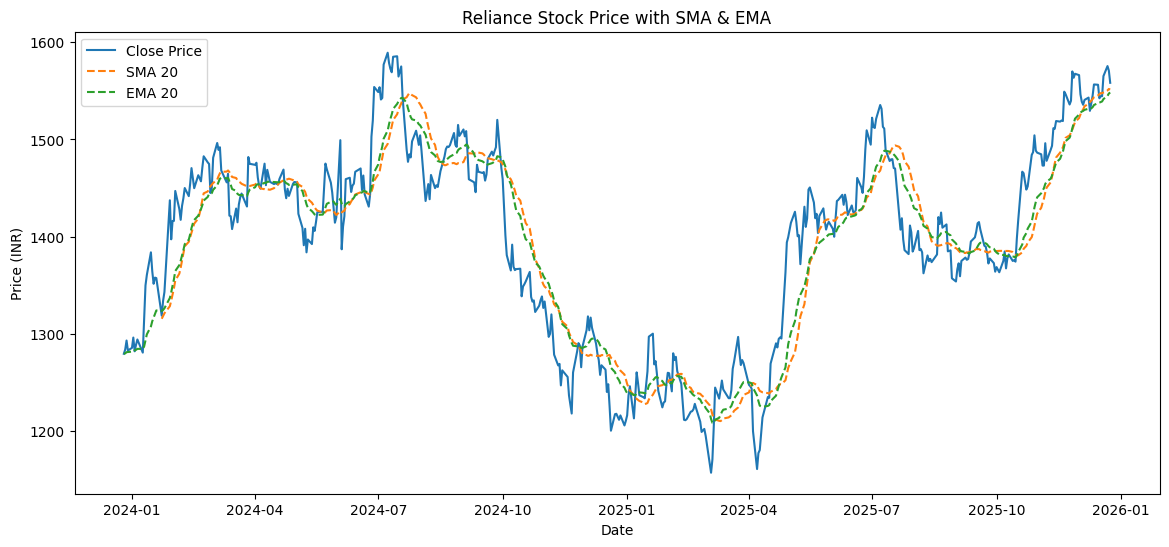

In [6]:
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['SMA_20'], label='SMA 20', linestyle='--')
plt.plot(df['EMA_20'], label='EMA 20', linestyle='--')
plt.title('Reliance Stock Price with SMA & EMA')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()


rsi

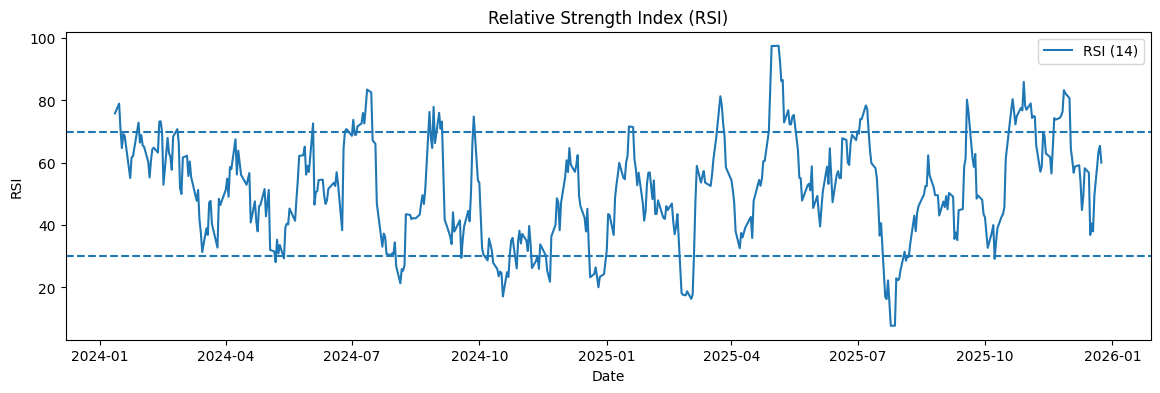

In [7]:
plt.figure(figsize=(14,4))
plt.plot(df['RSI_14'], label='RSI (14)')
plt.axhline(70, linestyle='--')
plt.axhline(30, linestyle='--')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()


macd

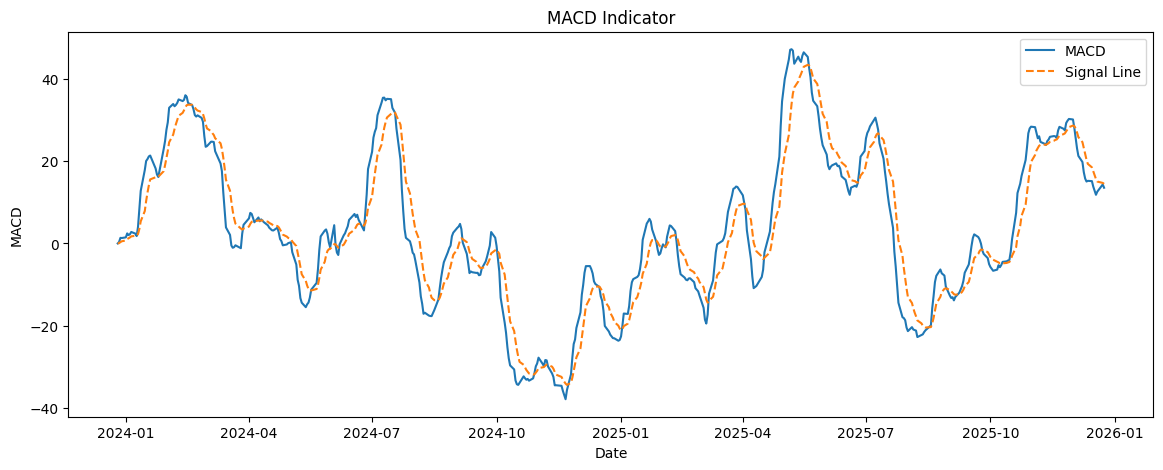

In [8]:
plt.figure(figsize=(14,5))
plt.plot(df['MACD'], label='MACD')
plt.plot(df['MACD_Signal'], label='Signal Line', linestyle='--')
plt.title('MACD Indicator')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.show()


stochastic oscillators

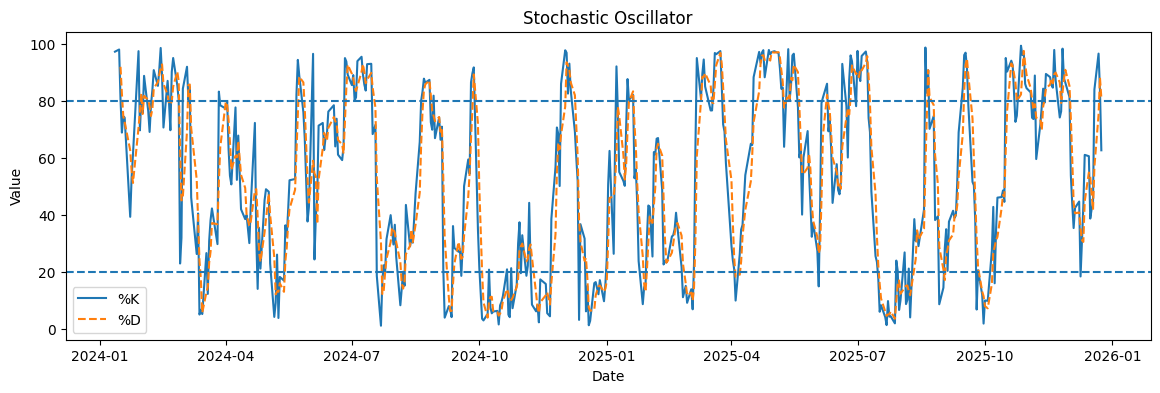

In [9]:
plt.figure(figsize=(14,4))
plt.plot(df['Stoch_%K'], label='%K')
plt.plot(df['Stoch_%D'], label='%D', linestyle='--')
plt.axhline(80, linestyle='--')
plt.axhline(20, linestyle='--')
plt.title('Stochastic Oscillator')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


bollinger bands + sma_20

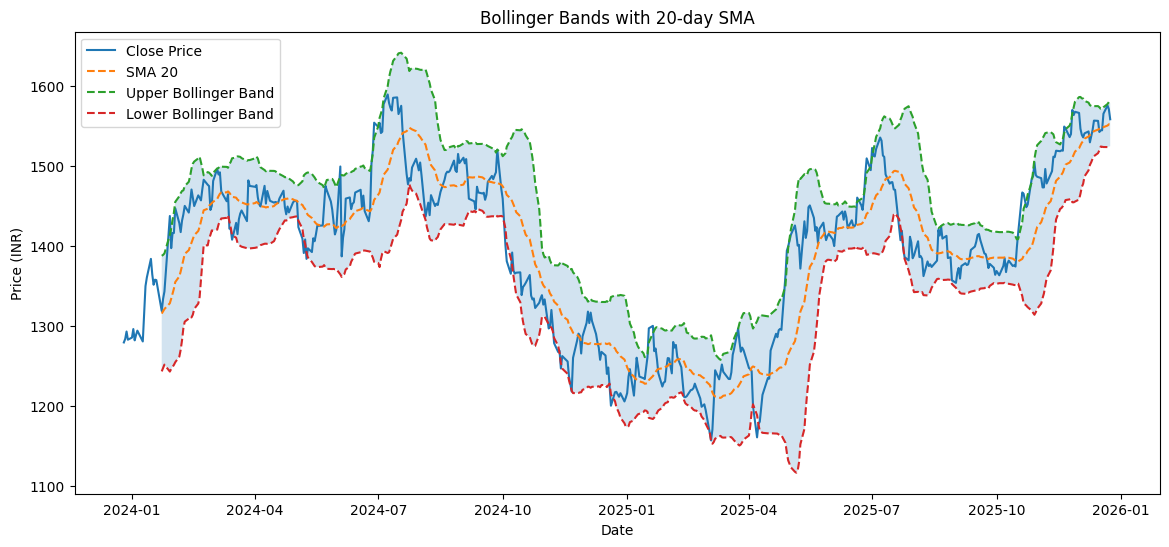

In [10]:
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['SMA_20'], label='SMA 20', linestyle='--')
plt.plot(df['BB_Upper'], label='Upper Bollinger Band', linestyle='--')
plt.plot(df['BB_Lower'], label='Lower Bollinger Band', linestyle='--')
plt.title('Bollinger Bands with 20-day SMA')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.fill_between(df.index, df['BB_Lower'], df['BB_Upper'], alpha=0.2)
plt.show()


29th April 2025

In [11]:
df.loc['2025-04-29']

,,2025-04-29
Price,Ticker,
Close,RELIANCE.NS,1.394132e+03
High,RELIANCE.NS,1.405287e+03
Low,RELIANCE.NS,1.364550e+03
Open,RELIANCE.NS,1.365546e+03
Volume,RELIANCE.NS,3.253897e+07
SMA_20,,1.258661e+03
EMA_20,,1.277837e+03
RSI_14,,8.413870e+01
MACD,,2.861801e+01
